# Diabetes Prediction Model


In [1]:
# Import Libraries...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset...
data = pd.read_csv("diabetes.csv")
data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


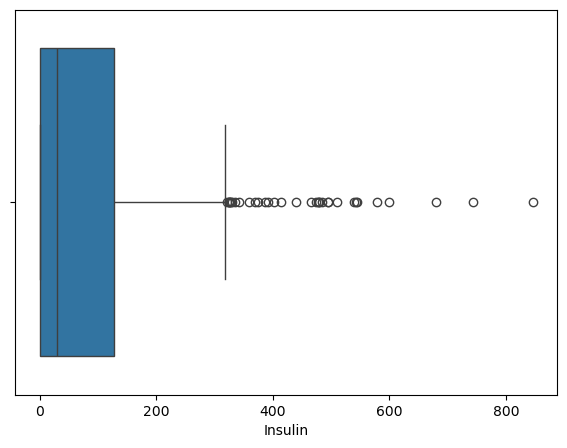

In [4]:
plt.figure(figsize=(7,5))
sns.boxplot(x = "Insulin", data = data)
plt.show()

In [5]:
data.shape

(768, 9)

In [6]:
q1 = data["Insulin"].quantile(0.25)
q3 = data["Insulin"].quantile(0.75)

IQR = q3 - q1

min_range = q1 - (1*IQR)
max_range = q3 + (1*IQR)
min_range , max_range

(-127.25, 254.5)

In [7]:
data = data[data["Insulin"] <= max_range]
data.shape

(712, 9)

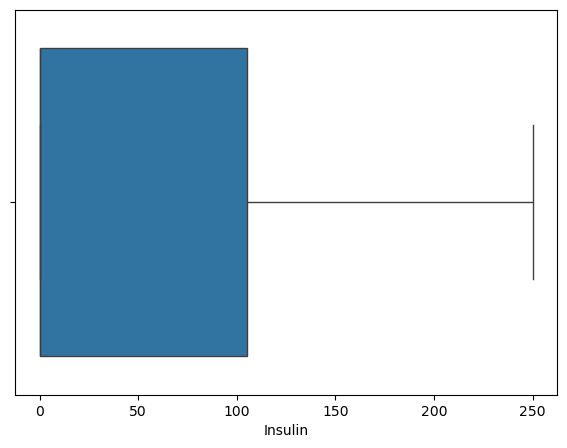

In [8]:
plt.figure(figsize=(7,5))
sns.boxplot(x = "Insulin", data = data)
plt.show()

In [9]:
# Spliting Input and Output dataset...
x = data.iloc[:,:-1]
y = data["Outcome"]

In [10]:
# Data Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.638107,0.966843,0.156850,0.954367,-0.793277,0.236160,0.513812,1.441773
1,-0.844701,-1.078851,-0.145935,0.579775,-0.793277,-0.648352,-0.352461,-0.186979
2,1.231231,2.103339,-0.246863,-1.230751,-0.793277,-1.065336,0.655052,-0.101255


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
# Model Train
from sklearn.svm import SVC

lr = SVC(kernel='rbf')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100 , lr.score(x_train,y_train)*100 

(84.61538461538461, 82.60105448154658)

In [13]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_test,y_test)*100 , lg.score(x_train,y_train)*100

(86.7132867132867, 77.32864674868189)

# Confusion Metrix

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Compute confusion matrix
cf = confusion_matrix(y_test, lg.predict(x_test))
cf

array([[93,  5],
       [14, 31]], dtype=int64)

In [15]:
# Plot confusion matrix
# plt.figure(figsize=(4,3))
# sns.heatmap(lr, annot=True, cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [16]:
precision_score(y_test, lr.predict(x_test))*100

84.84848484848484

In [17]:
recall_score(y_test, lr.predict(x_test))*100

62.22222222222222

In [18]:
f1_score(y_test, lr.predict(x_test))*100

71.7948717948718

In [19]:
lr.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [20]:
import pickle

pickle.dump((lg,sc),open("Diabetes_model.pkl","wb"))